# Image Explore


python-Levenshtein-0.12.0

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
sys.path.insert(1, '../src/')

from image_tools import *
from Levenshtein import ratio

## Get Data

In [2]:
data_path = "../../ndsc_data/"
path_image = '../../ndsc_data/training_img/training_img/'

In [3]:
d_train = pd.read_csv(os.path.join(data_path, "new_training_set.csv"),
                      usecols=["title_1", "image_1", "title_2", "image_2", "Label"])
d_test = pd.read_csv(os.path.join(data_path, "new_test_sample.csv"))

In [4]:
d_train.shape

(10181, 5)

In [15]:
d_train.head()

,title_1,image_1,title_2,image_2,Label
0,Johnson’s ® Top to Toe Hair & Body Bath 500ml,fdff8b9b8229da091dd7d070aae05f81.jpg,Johnson's cottontouch top to toe hair & body b...,41e191742760932598c7bd201e5dad47.jpg,0
1,Sandal Humble,906cc44f0be72d4e767669b5b63e3a17.jpg,Sandal Humble Glass - Glanzton,7a556b836bfdd08ea592216440524a34.jpg,0
2,PROMO LIKUID LIKUIT LIQUIT BABY POD LIQUID SAL...,475c26635de18b9f93032400732ff336.jpg,Voporizer Liquit - Likuit - Likuid - Liquid Pr...,ace93bec689f3f1565800c500a8341fa.jpg,0
3,6 Pasang / Set Anting Tusuk Bentuk Lingkaran A...,e630997f6217555d6026547ad1c15f0b.jpg,Subei 6 Pasang / Set Anting Tusuk Boho Bohemia...,31abbc176b09f5bd1728cfc3ecbbfb9c.jpg,0
4,ROREC NATURAL SKIN CARE MASK ROREC SHEET MASK ...,a27d11700a7902febd039dc3a96f10f2.jpg,Rorec 86 Natural Skin Care Shert Mask All Variant,813ad9dd638c10f1765db9dde20c9e42.jpg,1


In [16]:
d_test.head()

,Unnamed: 0,title_1,image_1,title_2,image_2
0,0,12.12 SUPER PROMO !! Sandal Jepit Pantai Fashion,83d1798fee1c90c2845204d9261169bb.jpg,Clarisse CRAZY OFFER Beli 5 Dapet 12 POLKA SUM...,caba83a8a7f9def9c4d268b6c34da7f4.jpg
1,1,Damai fashion jakarta - long dress JUMBO wanit...,126868769ca4a4694d36d28960f9de8a.jpg,[VIP] kasih fashion jakarta - long dress JUMBO...,7fdfe855a7be9c87238757c43b712b81.jpg
2,2,My Baby Minyak Telon 145 ML,86aee3dc281911f5f9d50fea17b978f0.jpg,My Baby Minyak Telon Plus 145 Ml 4btl kemasan ...,0ec544d3d4169df76ae156e76c724f0c.jpg
3,3,Creative Waterborne Marker Very Fine Double - ...,40ef98354335cf4780937da703ed6d65.jpg,SOMETHINC BROW WIZ Retractable Eyebrow,9cf798e5f940429f14b4af0fd48992a4.jpg
4,4,Goblin♛ COD Tas Ransel Anak Sekolah Karakter K...,c28512df97d0fc1d61fd30de966e01c3.jpg,TAS KARAKTER ANAK LUCU,a4c09a46d8b1adda43a2433d40bba583.jpg


## Check Image

In [7]:
d_train_1 = d_train[d_train.Label == 1]

beda = [6,7,7,4,6,8,8,6,6]
(np.array(beda)/15).std()

0.0776895443089001

In [8]:
## ~43% (plus-minus 7%) of the similar product doesn't have the same images

In [8]:
# for i in range(15):
#     img_check = d_train_1[['image_1','image_2']].sample().values[0]
#     check_image(img_check, figsize = (10,8))

In [9]:
d_train_0 = d_train[d_train.Label == 0]

beda0 = [2,2,0,0,1,1,0,1,0]
(np.array(beda0)/15).mean()

0.05185185185185185

In [11]:
## ~5% (plus-minus 5%) of the different product have the same images

In [10]:
# for i in range(15):
#     img_check = d_train_0[['image_1','image_2']].sample().values[0]
#     check_image(img_check, figsize = (10,8))

In [14]:
img1 = cv2.imread(path_image+img_check[0])

In [15]:
img1.shape

(640, 640, 3)

In [21]:
640/4

160.0

## Check Image with txt

In [21]:
d_train_1 = d_train[d_train.Label == 1]

In [14]:
!pip install python-Levenshtein

  Using cached python-Levenshtein-0.12.0.tar.gz (48 kB)
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp38-cp38-macosx_10_9_x86_64.whl size=79474 sha256=68ff9e500ea38efa1e59a6ab17f87b9473d34ae50bfcf8a9a58e6ccec27faae4
  Stored in directory: /Users/alamhanz/Library/Caches/pip/wheels/a8/da/22/2970e270912ba623ccac7d516b7411a820c8f2b4252463a605
Successfully built python-Levenshtein


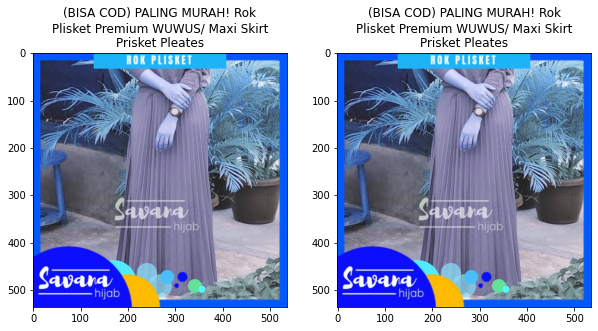

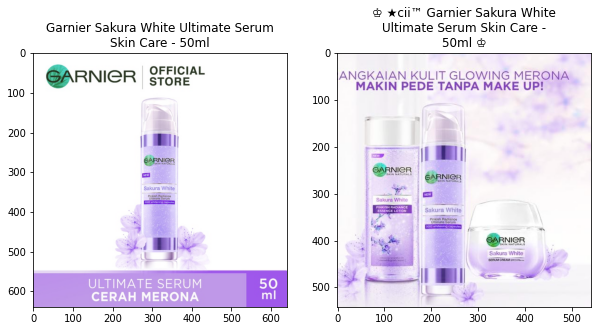

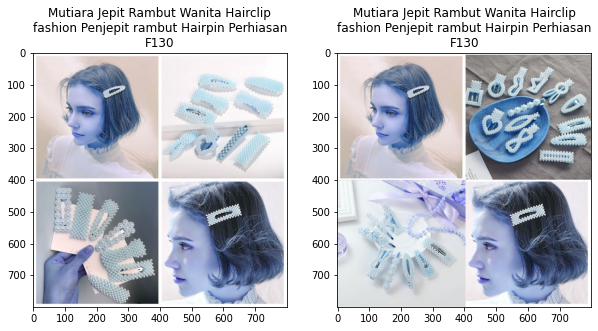

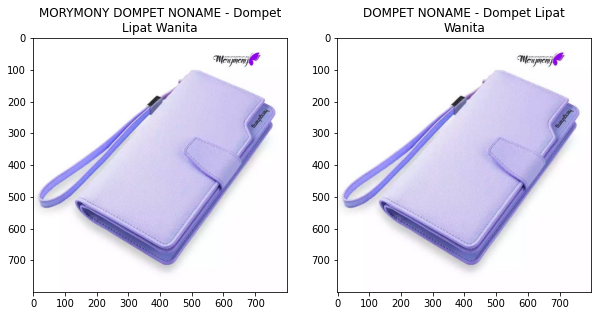

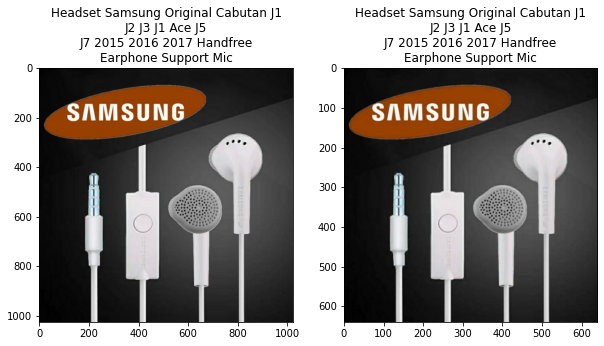

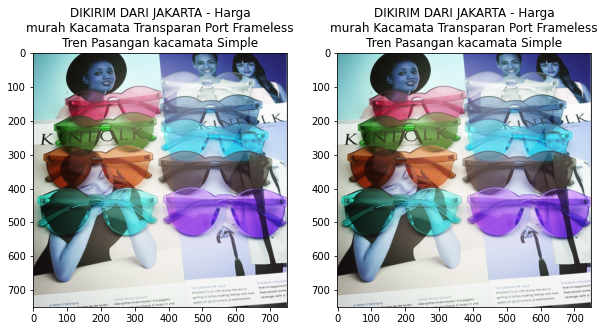

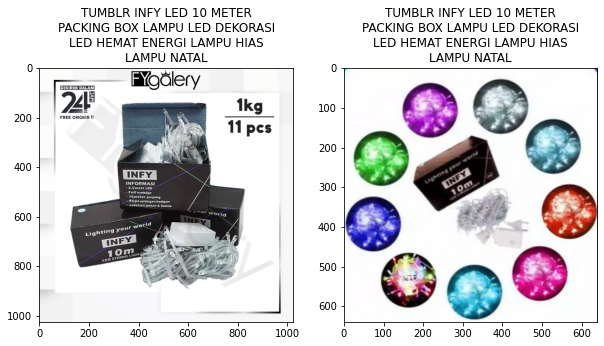

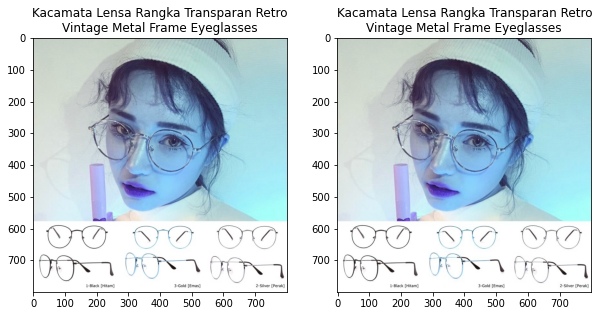

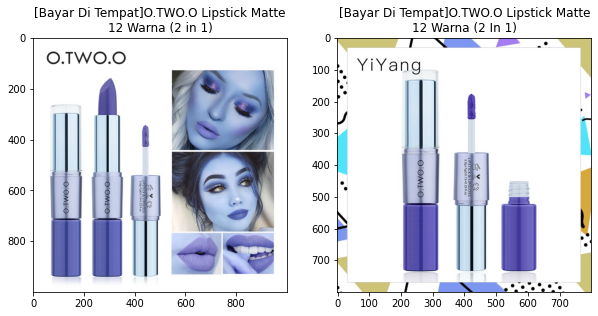

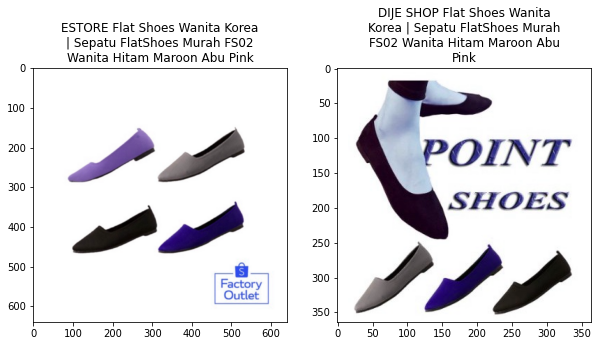

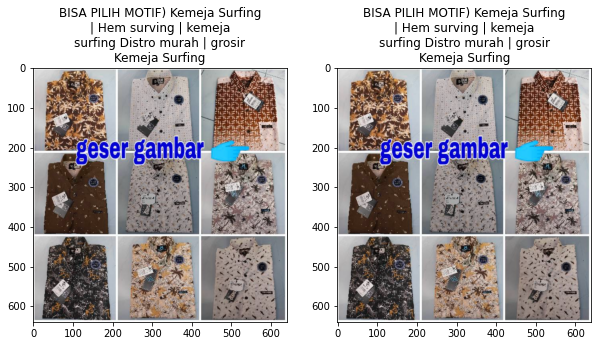

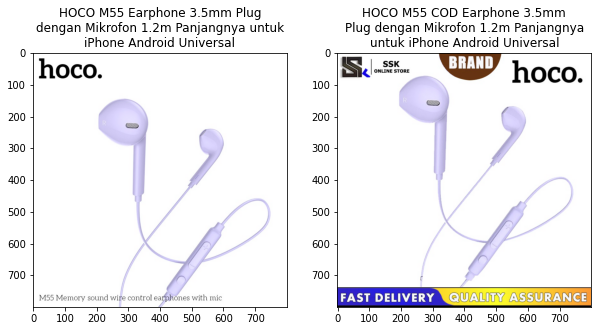

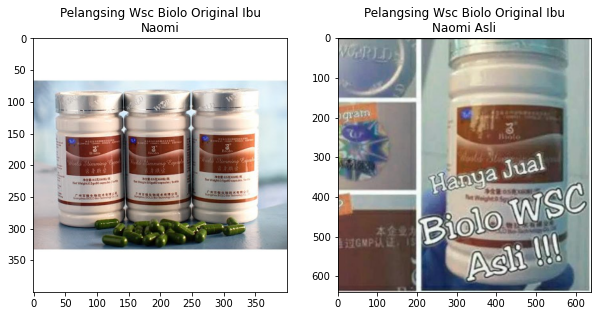

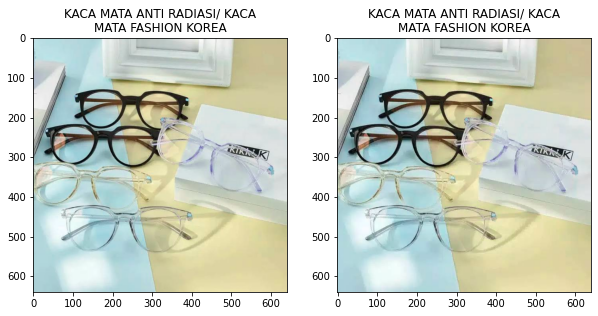

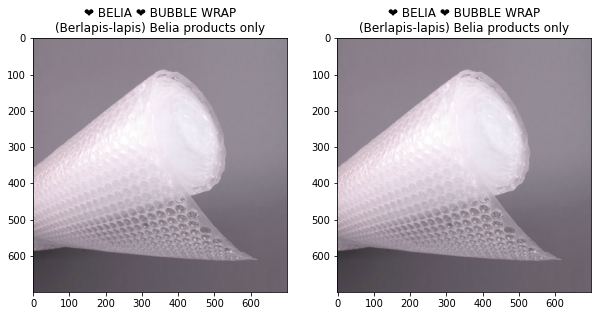

In [20]:
for i in range(15):
    k = True
    while k==True:
        df0 = d_train_1.sample()    
        img_check = df0[['image_1','image_2']].values[0]
        title_check = df0[['title_1','title_2']].values[0]
        
        if ((title_check[0] == title_check[1]) or (ratio(title_check[1],title_check[0]) >= 0.9) 
                    or (title_check[1] in title_check[0]) or (title_check[0] in title_check[1])):
            k=False
        
    check_image(img_check, figsize = (10,8), title = title_check)